In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate
import statsmodels.api as sm


**1. ANALYSIS OF CLIMATE DATA**

In [24]:
df = pd.read_csv("DATA/CLEAN DATA/climate_reduced.csv")
df.columns

Index(['Country', 'Year', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Rainfall (mm)',
       'Extreme Weather Events'],
      dtype='object')

**Visualize indicators using Heatmap**

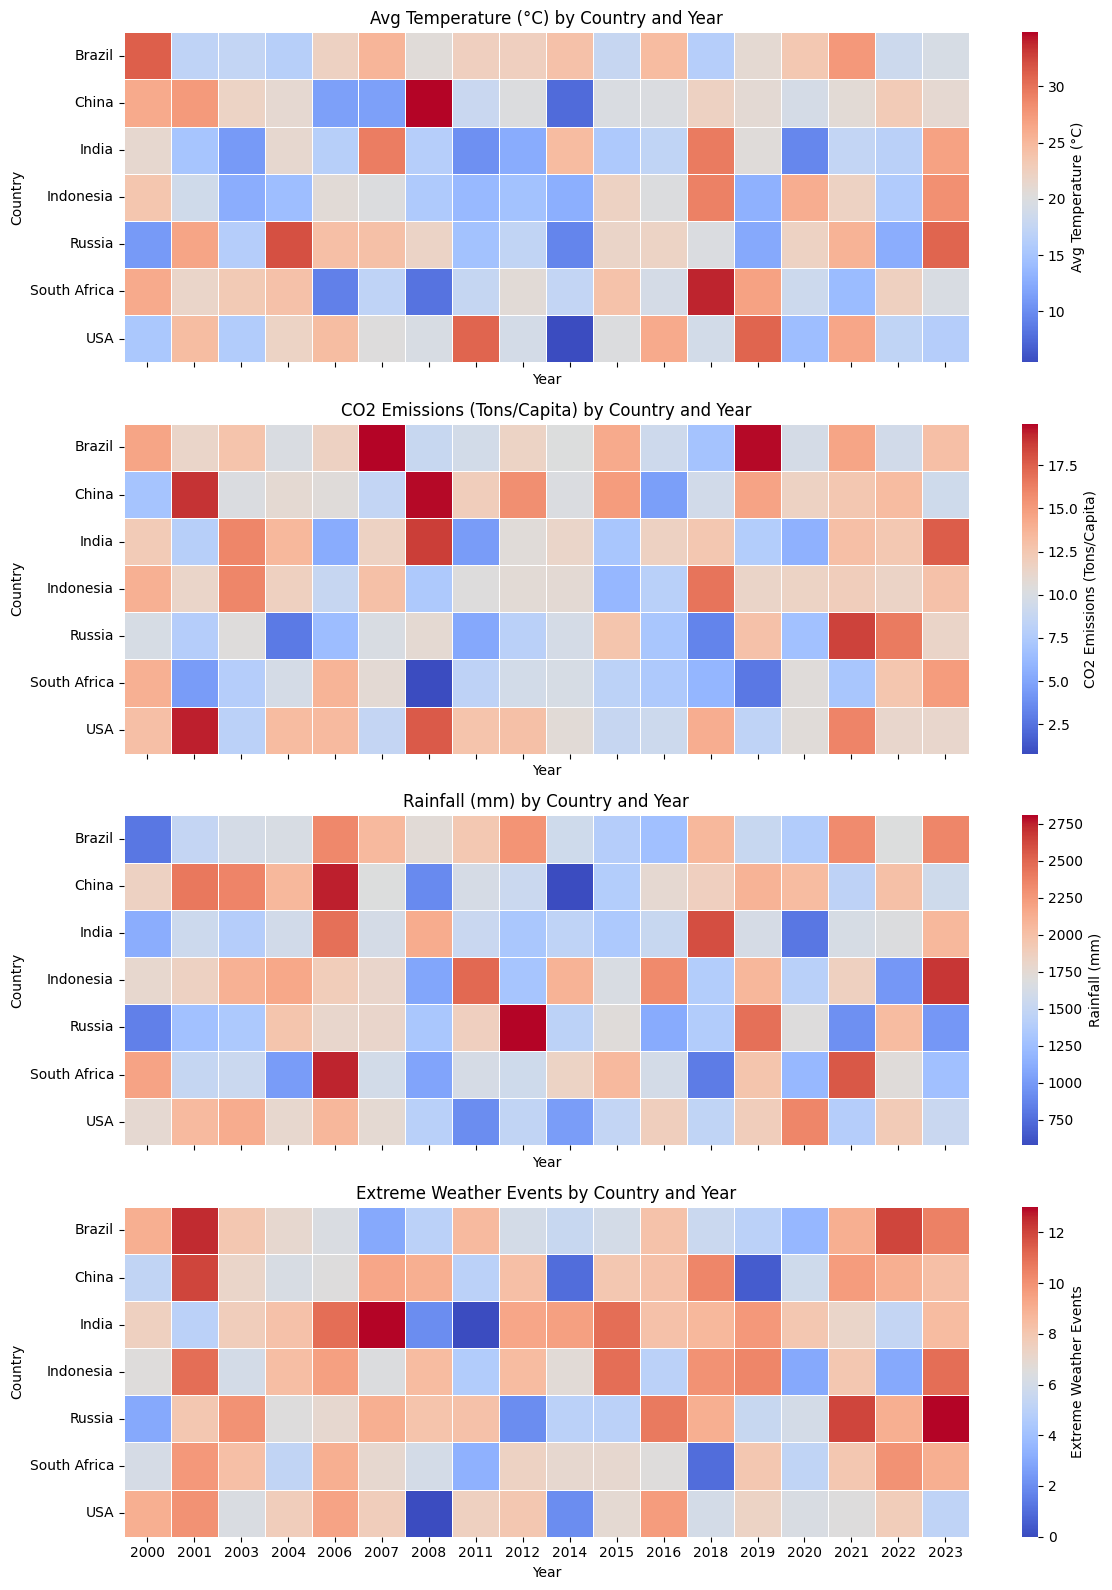

In [25]:

# List of climate indicators to visualize
climate_ind = [
    "Avg Temperature (°C)",
    "CO2 Emissions (Tons/Capita)",
    "Rainfall (mm)",
    "Extreme Weather Events"
]

# Create one heatmap per indicator. We use heatmap to visualize which country warms up fastest overtime.
fig, axes = plt.subplots(len(climate_ind), 1, figsize=(12, 16), sharex=True)

for i, ind in enumerate(climate_ind):
    # Create pivot table: Country as rows, Year as columns
    pivot = df.pivot_table(
        values=ind,
        index="Country",
        columns="Year"
    )

    # Plot heatmap
    sns.heatmap(
        pivot,
        ax=axes[i],
        cmap="coolwarm",
        linewidths=0.5,
        cbar_kws={"label": ind}
    )
    axes[i].set_title(f"{ind} by Country and Year")
    axes[i].set_ylabel("Country")

axes[-1].set_xlabel("Year")  # Only last subplot has xlabel
plt.tight_layout()
plt.show()

 *Avg Temperature (°C) by country and year*: Countries like Brazil and South Africa show warmer temperatures, while Russia and the USA show greater fluctuations and cooler average temperatures.

*CO2 Emissions (Tons/Capita) by country and year*: The USA, China, and Brazil show periods of very high emissions, while India and South Africa show lower per capita emissions with occasional spikes.

*Rainfall (mm)*: Indonesia and China experience frequent periods of high rainfall, while Brazil and Russia display more variable precipitation levels over time

*Extreme Weather Events*: countries like Brazil, India, and Russia experienced several peak years (2001, 2007, 2022–2023) with high numbers of extreme weather events (dark red), suggesting growing unpredictability and intensity of weather patterns (more frequent, severe, or irregular extreme weather events such as floods, heatwaves, droughts, or storms) over time. Brazil, India, and Russia experience spikes in extreme weather events in recent years (2022–2023) compared to the early 2000s. This pattern suggests that extreme weather is not only persisting but may be intensifying, which aligns with concerns about climate change driving more hazardous weather globally. 

**Countries most affected by climate indicators**

In [28]:
#RANK BY THE MOST AFFECTED
# Step 1: Group by country and compute averages
avg_temp = df.groupby("Country")["Avg Temperature (°C)"].mean()
avg_co2 = df.groupby("Country")["CO2 Emissions (Tons/Capita)"].mean()
avg_rain = df.groupby("Country")["Rainfall (mm)"].mean()
avg_events = df.groupby("Country")["Extreme Weather Events"].mean()

# Step 2: Combine into one DataFrame
climate_rank_df = pd.DataFrame({
    "Avg_Temp": avg_temp,
    "Avg_CO2": avg_co2,
    "Avg_Rain": avg_rain,
    "Avg_Events": avg_events
})

# Step 3: Rank each column (lower rainfall = worse, higher others = worse)
climate_rank_df["Rank_Score"] = (
    climate_rank_df["Avg_Temp"].rank(ascending=False) +     # higher temp = worse
    climate_rank_df["Avg_CO2"].rank(ascending=False) +      # higher CO2 = worse
    climate_rank_df["Avg_Events"].rank(ascending=False) +   # more extreme events = worse
    climate_rank_df["Avg_Rain"].rank(ascending=False)        # lower rainfall = worse
)

# Step 4: Sort and view worst-affected countries
climate_worst = climate_rank_df.sort_values("Rank_Score")
print(climate_worst[["Rank_Score"]])


              Rank_Score
Country                 
Brazil              10.0
China               13.0
Indonesia           13.0
USA                 14.0
India               19.0
Russia              20.0
South Africa        23.0


This ranking shows the overall climate-related Rank_Score for each country, with lower scores indicating better (or more favorable) outcomes. 
Brazil has the best score (10.0), suggesting relatively better climate conditions or performance, while South Africa ranks lowest (23.0), 
implying more concerning environmental or climate indicators.

**2. ANALYSIS OF TUBERCULOSIS (TB) DATA**

In [21]:
df = pd.read_csv("DATA/CLEAN DATA/tb_reduced.csv")
df.columns

Index(['Country', 'Year', 'TB_Cases', 'TB_Deaths', 'TB_Incidence_Rate',
       'TB_Mortality_Rate'],
      dtype='object')

**Visualize TB indicators using lineplot**

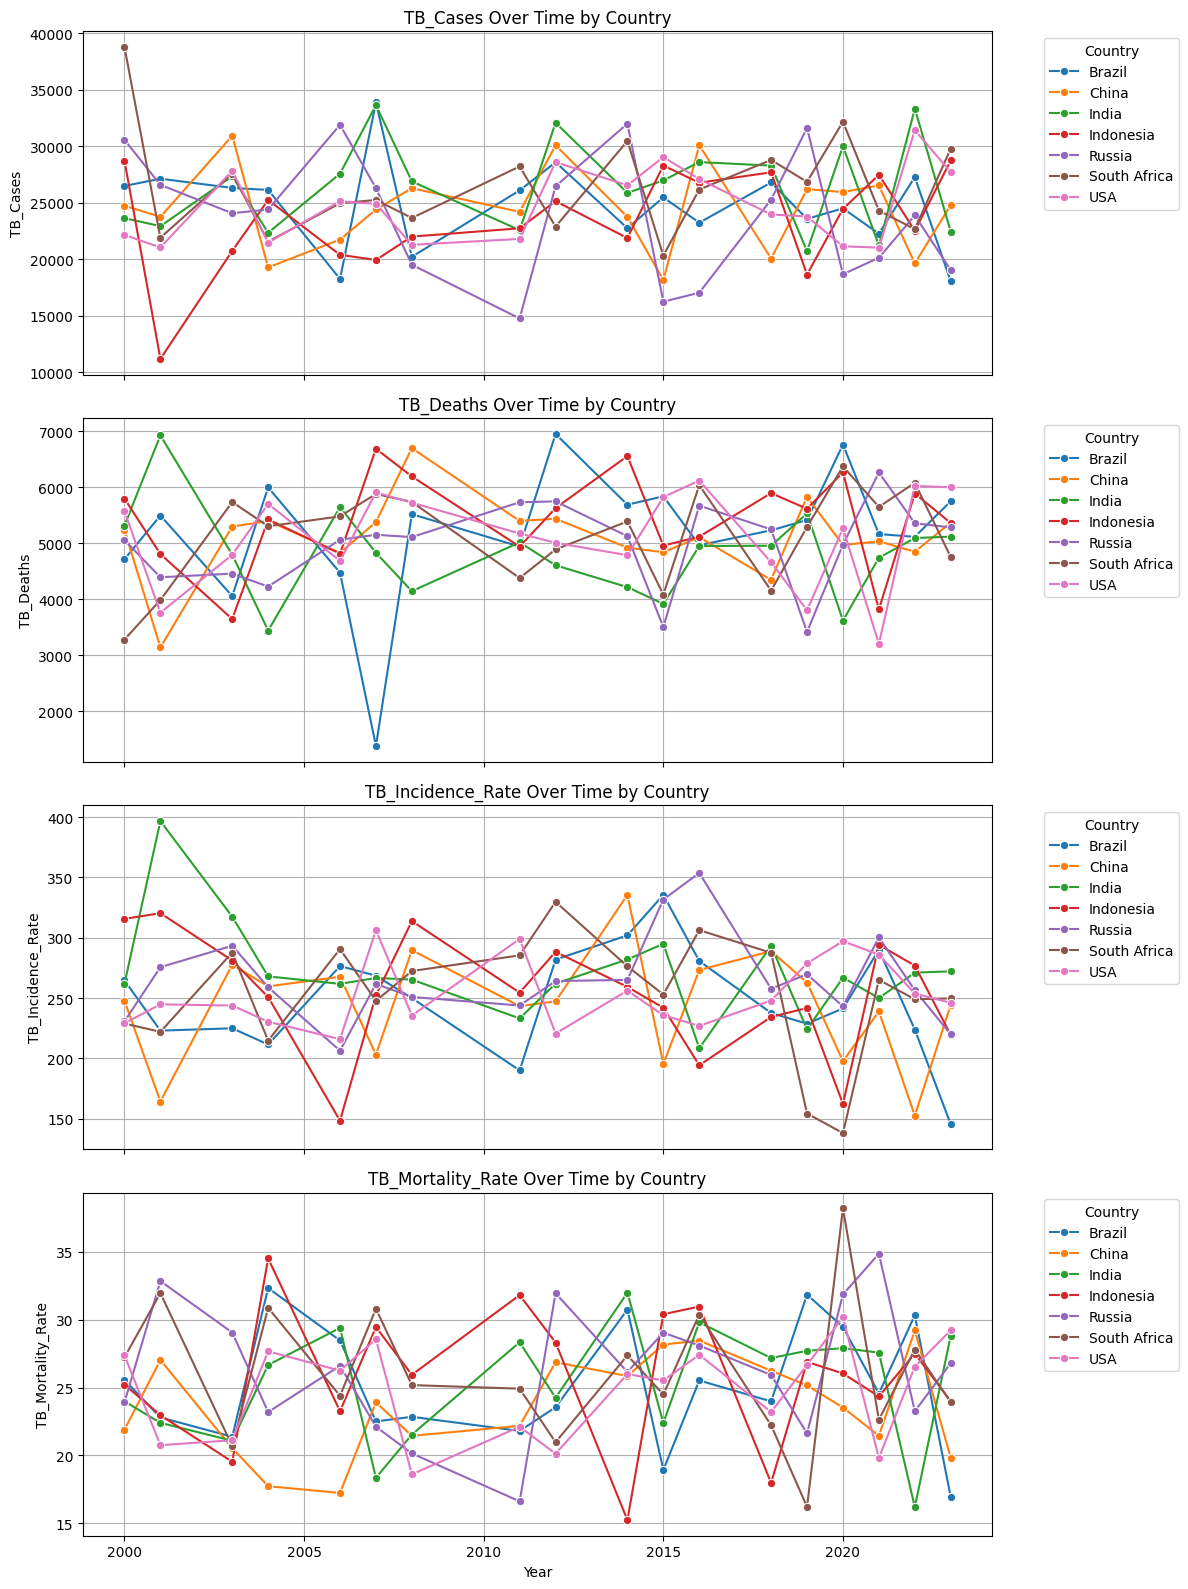

In [11]:
# List of TB indicators to plot
tb_indicators = [
    'TB_Cases',
    'TB_Deaths',
    'TB_Incidence_Rate',
    'TB_Mortality_Rate'
]

# Create one subplot per TB indicator
fig, axes = plt.subplots(len(tb_indicators), 1, figsize=(12, 16), sharex=True)

for i, indicator in enumerate(tb_indicators):
    sns.lineplot(
        data=df,
        x="Year",
        y=indicator,
        hue="Country",
        ax=axes[i],
        marker="o"
    )
    axes[i].set_title(f"{indicator} Over Time by Country")
    axes[i].set_ylabel(indicator)
    axes[i].grid(True)
    axes[i].legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()

*TB_Cases by country and year*: all countries exhibit fluctuations of TB cases. India, South Africa, and Indonesia tend to have consistently higher TB case numbers, occasionally spiking above 30,000 cases. There is no clear long-term declining trend in any country, indicating that TB remains a persistent public health concern globally, especially in the higher-burden countries such as India, South Africa, and Indonesia.

*TB_Deaths*: TB death counts are lower than case counts, staying mostly between 3,000 and 7,000 per year. India, South Africa, and China frequently appear among the countries with higher deaths.    

*TB_Incidence_Rate*: there is a fluctuating TB incidence rates across countries, with India and Indonesia reaching the highest peaks, indicating ongoing transmission challenges. Countries like China and the USA display relatively lower and more stable incidence rates, suggesting better TB control efforts.

*TB_Mortality_Rate*: The TB mortality rate trends remain under 40 per 100,000 in all countries, but Russia, South Africa, and Indonesia show notable spikes. In contrast, USA and China maintain low mortality rates.

In [19]:
#Rank countries to identify the worst affected

# Group and aggregate TB indicators
total_cases = df.groupby("Country")["TB_Cases"].sum()
avg_incidence = df.groupby("Country")["TB_Incidence_Rate"].mean()
total_deaths = df.groupby("Country")["TB_Deaths"].sum()
avg_mortality = df.groupby("Country")["TB_Mortality_Rate"].mean()

# Combine all into one DataFrame
rank_df = pd.DataFrame({
    "Total_Cases": total_cases,
    "Avg_Incidence": avg_incidence,
    "Total_Deaths": total_deaths,
    "Avg_Mortality": avg_mortality
})
# Rank each column (higher values = worse outcomes)
rank_df["Rank_Score"] = rank_df.rank(ascending=True).sum(axis=1)

# Highest rank score = highest impacted)
worst_affected = rank_df.sort_values("Rank_Score")
print(worst_affected)

                Total_Cases  Avg_Incidence  Total_Deaths  Avg_Mortality  \
Country                                                                   
China         440280.523855     243.821323  92098.997405      23.707711   
USA           445636.292326     252.948829  92034.000256      24.840715   
Indonesia     422269.733387     252.707198  97439.284593      25.797804   
Brazil        446689.194478     248.639918  93476.860409      25.197575   
Russia        428156.922204     265.689474  89798.224458      26.335213   
India         476177.880141     271.939655  86875.539304      25.310060   
South Africa  476016.478133     253.203493  92504.965415      26.125486   

              Rank_Score  
Country                   
China                9.0  
USA                 13.0  
Indonesia           16.0  
Brazil              16.0  
Russia              17.0  
India               19.0  
South Africa        22.0  


According to this table data:

India has the highest Avg_Incidence rate (271.94) and a relatively high Total_Cases (476,178), indicating a high burden of disease.

South Africa has the highest Total_Deaths (92,505) and Avg_Mortality (26.13), showing more severe outcomes despite a slightly lower incidence rate.

China has the lowest Rank_Score (9.0), suggesting it is comparatively better in overall disease burden or control.

Countries like Russia, India, and South Africa show higher Rank_Scores (worse rankings), reflecting higher impact based on the metrics.

**3. CORRELATION TB-CLIMATE OVERTIME**

In [4]:
#CORRELATION TB-CLIMATE OVERTIME
df = pd.read_csv("DATA/CLEAN DATA/merged_dataset.csv")
df.columns

Index(['Country', 'Year', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Rainfall (mm)',
       'Extreme Weather Events', 'TB_Cases', 'TB_Deaths', 'TB_Incidence_Rate',
       'TB_Mortality_Rate'],
      dtype='object')

In [34]:
# Select relevant columns
tb_col = "TB_Incidence_Rate"
climate_cols = [
    "Avg Temperature (°C)",
    "CO2 Emissions (Tons/Capita)",
    "Rainfall (mm)",
    "Extreme Weather Events"
]

# Calculate correlations
correlations = {}

for col in climate_cols:
    corr = df[tb_col].corr(df[col])
    correlations[col] = corr

# Display correlations sorted by absolute value descending
sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("Correlation of TB Incidence Rate with Climate Indicators:")
for climate_var, corr_value in sorted_corr:
    print(f"{climate_var}: {corr_value:.3f}")

Correlation of TB Incidence Rate with Climate Indicators:
Rainfall (mm): -0.155
Extreme Weather Events: -0.103
Avg Temperature (°C): -0.090
CO2 Emissions (Tons/Capita): -0.004


*Correlation Interpretation Scale*

Correlation Coefficient (r)	Strength of Relationship:

±0.90 to ±1.00	Very strong

±0.70 to ±0.89	Strong

±0.40 to ±0.69	Moderate

±0.20 to ±0.39	Weak

±0.01 to ±0.19	Very weak / Slight

0	No correlation

Using the Scale above:

Rainfall (mm)	-0.155	Slight negative correlation: as rainfall increases, TB incidence tends to slightly decrease.

Extreme Weather Events	-0.103	Weak negative correlation.

Avg Temperature (°C)	-0.090	Very weak negative correlation.

CO2 Emissions (Tons/Capita)	-0.004	Almost no linear correlation.

Rainfall shows the strongest (though still weak) relationship with TB incidence. Negative correlation means more it rains slightly TB rates lower.

Other climate variables have very weak or negligible correlations with TB incidence in this dataset.

Overall, none of the climate variables show a strong linear correlation with TB incidence.

**4. CHECK FOR NONLINEAR RELATIONSHIPS BETWEEN CLIMATE VARIABLES AND TB INCIDENCE** 

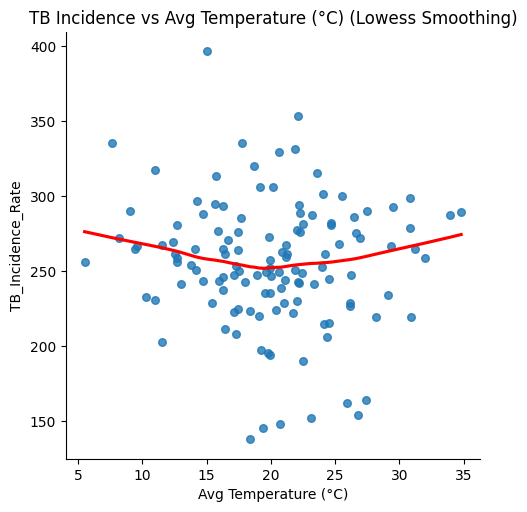

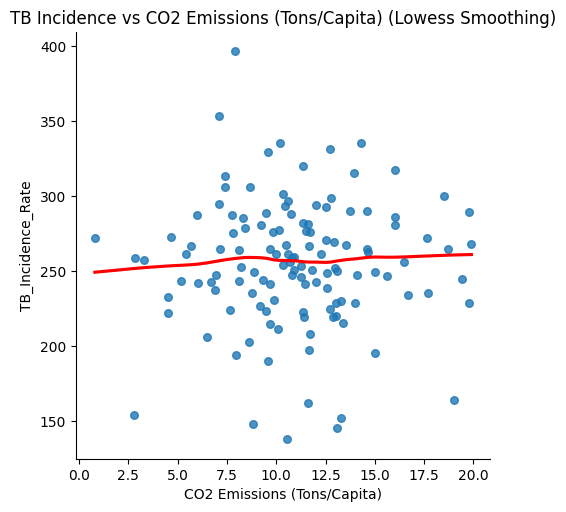

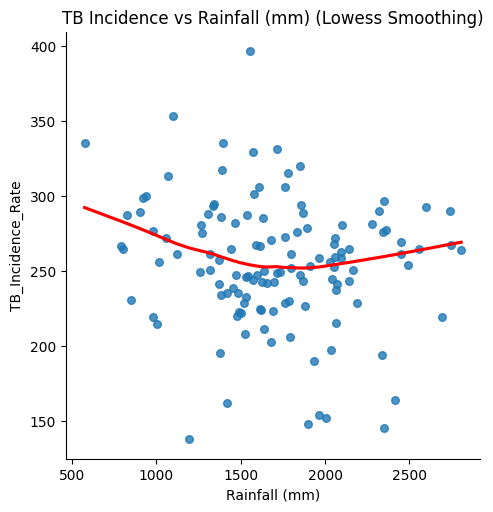

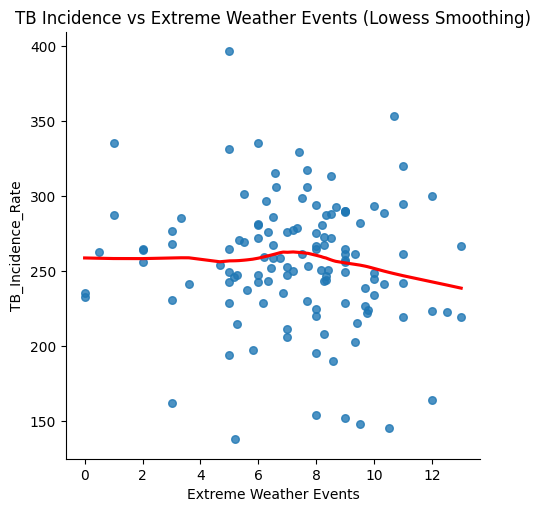

In [8]:
# As the correlation TB-Climate indicators remain negative, we will check for nonlinear relationships between variables and TB incidence, 
# using Scatterplots.

# Columns: ['TB_Incidence'(dependant variable), 'Rainfall', 'Extreme_Weather', 'Avg_Temp', 'CO2_Emissions'(independant variables)]

variables = ['Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Rainfall (mm)',
       'Extreme Weather Events']
for var in variables:
    sns.lmplot(data=df, x=var, y='TB_Incidence_Rate', lowess=True, scatter_kws={'s': 30}, line_kws={'color': 'red'})
    plt.title(f"TB Incidence vs {var} (Lowess Smoothing)")
    plt.show()

*TB Incidence vs Avg Temperature*

The scatterplot shows a nonlinear relationship between average temperature and TB incidence. The slight U-shape indicates that TB incidence appears 
to decrease as temperature increases up to around 20°C, then rises again, suggesting moderate temperatures may be associated
with lower TB rates, while both lower and higher extremes could relate to higher TB burdens.
The relationship shown in the graph is nonlinear, not a simple increase or decrease.
From low to moderate temperatures (around 5°C to 20°C): TB incidence decreases slightly.
Beyond moderate temperatures (20°C to 35°C): TB incidence rises again.
Higher temperatures (above ~25°C) are associated with a slight increase in TB incidence in this dataset.
    
*TB Incidence vs CO2 Emission*

This scatterplot reveals no strong correlation between CO₂ emissions per capita and TB incidence rate, as the data points are widely dispersed. 
The red LOWESS curve is nearly flat with a very slight upward trend, suggesting that increased CO₂ emissions may be weakly associated 
with slightly higher TB rates, but the relationship is minimal and likely not statistically significant.

*TB Incidence vs Rainfall*

The red Lowess line suggests a nonlinear relationship between rainfall and TB incidence: 
TB rates slightly decrease with rainfall up to around 1500–1700 mm, then stabilize or slightly increase beyond that. 
This U-shaped curve implies that moderate rainfall may be associated with lower TB incidence, while both low 
and high rainfall levels could correlate with higher TB rates.

*TB Incidence vs Extreme Weather Events*
    
The red Lowess line shows that TB incidence remains relatively stable at lower levels of extreme weather events, 
but begins to decline slightly as the number of extreme events increases. This suggests a mild negative trend, 
where more extreme weather events may be associated with slightly lower TB incidence, though the effect appears small 
and possibly influenced by data variability.

In [36]:

# Step 1: Define X (predictors) and y (target)
X = df[[
    "Avg Temperature (°C)",
    "CO2 Emissions (Tons/Capita)",
    "Rainfall (mm)",
    "Extreme Weather Events"
]]
y = df["TB_Incidence_Rate"]

# Step 2: Add constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the model
model = sm.OLS(y, X).fit()

# Step 4: View the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      TB_Incidence_Rate   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.223
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.305
Time:                        23:18:45   Log-Likelihood:                -648.22
No. Observations:                 126   AIC:                             1306.
Df Residuals:                     121   BIC:                             1321.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

Interpretation
Rainfall (p = 0.087) shows the closest to significance, suggesting more rain may reduce TB incidence, though it's not statistically significant at the 0.05 level.

Other variables (temperature, CO₂, extreme weather) show no statistically significant effect.

Overall, your model does not explain much of the TB variation — suggesting:

TB rates may be driven more by non-climatic factors (like poverty, healthcare access, population density, HIV burden, etc.).

The relationship between TB and climate may be non-linear or indirect (e.g., climate affects malnutrition, which affects TB risk).